<a href="https://colab.research.google.com/github/VishalShah1999/Visulization_ML/blob/main/Homework_3_CS_GY_9223.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 3

In this homework you will use `sklearn` to analyze and visualize model performance. You will be required to use the _new_ `sklearn` implementations, as well as write some of your own functions. You can see `sklearn`'s new visualization API documentation [here](https://scikit-learn.org/stable/visualizations.html#visualizations).

*Do not change* the code block below. It generates the data and trains the model you use.

In [65]:
# Constants. DO NOT CHANGE.
RANDOM_STATE = 2022

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=1_000, n_features=20, n_informative=2, n_redundant=10, random_state=RANDOM_STATE
)  # Generate data

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.8, random_state=RANDOM_STATE
)  # Split into test and train set

clf = RandomForestClassifier(random_state=RANDOM_STATE)  # Random Forest model
clf.fit(X_train, y_train)

y_preds_proba = clf.predict_proba(X_test)  # Predicted probabilities
y_preds_label = clf.predict(X_test)  # Predicted label

In [66]:
# Probability predictions. First column is for class "0", second is for class "1"
y_preds_proba

array([[0.99, 0.01],
       [0.91, 0.09],
       [0.1 , 0.9 ],
       ...,
       [0.99, 0.01],
       [0.09, 0.91],
       [0.26, 0.74]])

In [67]:
y_test.shape

(800,)

In [68]:
# Label predictions using a standard 0.5 threshold
y_preds_label

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,

# (1) Plot Confusion Matrix

Plot the confusion matrix for the test set.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


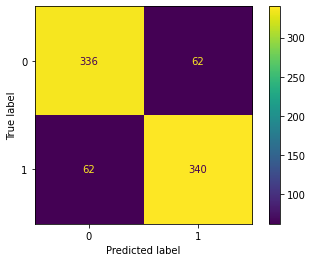

In [69]:
# Plot the confusion matrix for the test set.
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)

# (2) Classification Report

Calculate the precision, recall, accuracy and f1-score for the test set.

In [70]:
# Calculate the precision, recall, accuracy and f1-score for the test set.
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds_label))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       398
           1       0.85      0.85      0.85       402

    accuracy                           0.84       800
   macro avg       0.84      0.84      0.84       800
weighted avg       0.84      0.84      0.84       800



# (3) Plot ROC Curve and Report AUC

Plot the ROC curve and report the AUC for the test set.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


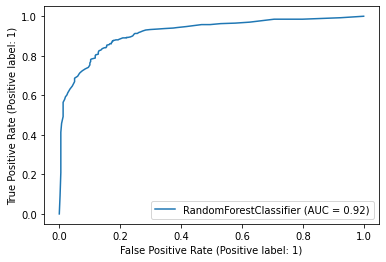

In [71]:
# Plot the ROC curve and report the AUC for the test set.
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf, X_test, y_test)

# (4) Expected Calibration Error (ECE), Maximum Calibration Error (MCE), Plot Reliability Diagram

Using `calibration_curve`, which you can access via `from sklearn.calibration import calibration_curve`, calculate:

ECE when `calibration_curve(..., method="quantile")` -- this produces bins of equal sample size
MCE when `calibration_curve(..., method="uniform")` -- this produces bins of equal width

Then, plot the reliability diagram for `method="quantile"` and `method="uniform"`. Comment on which one you believe is "better" to report (i.e., what are the pros and cons of using "quantile" compared to "uniform")



Text(0.5, 1.0, 'Calibration plots')

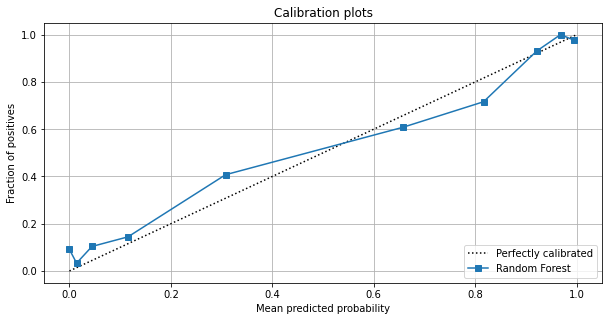

In [ ]:
from sklearn.calibration import CalibrationDisplay
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
#colors = plt.cm.get_cmap("Dark2")

ax_calibration_curve = fig.add_subplot(gs[:2, :2])

display = CalibrationDisplay.from_estimator(
    clf,
    X_test,
    y_test,
    n_bins=10,
    name='Random Forest',
    strategy="quantile",  # Equal bin size
    ax=ax_calibration_curve
)

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

In [ ]:
# Calculated ECE for calibration_curve(..., strategy="quantile")

# Calculate MCE for calibration_curve(..., strategy="uniform")

# Plot reliability diagrams for each

# (5) Brier Score and Log Loss

Write your own Brier Score and Log Loss functions for the data from above. Ensure that the outputs equal those from `sklearn`. You can access `sklearn`'s implementation using 

```
from sklearn.metrics import brier_score_loss, log_loss
```

DO NOT simply write a wrapper for `sklearn`'s implementation. Write your own, test it, and show the results of the test.

In [72]:
import numpy as np

In [73]:
def custom_brier_score(y_test, y_pred):
  losses = np.subtract(y_test, y_pred)**2
  brier_score = losses.sum()/800
  return brier_score
def custom_log_loss(y_test, y_pred):
  m = 0
  eps = 1e-15
  for i, j in enumerate(y_test):
    p = y_pred[i]
    if j == 0:
      m = m + np.log(1 - y_pred[i] + eps)
    else:
      m = m + np.log(y_pred[i] + eps)
  return (-m/len(y_test))

In [74]:
print("Custom Brier Score = ", custom_brier_score(y_test, y_preds_proba[:,1]))
print("Custom Log Loss = ", custom_log_loss(y_test, y_preds_proba[:,1]))

Custom Brier Score =  0.1130645
Custom Log Loss =  0.5219801484938171


In [76]:
# Sanity Check
from sklearn.metrics import brier_score_loss
from sklearn.metrics import log_loss

print("Sklearn's Brier Score = ",brier_score_loss(y_test, y_preds_proba[:,1]))
print("Sklearn's Log Loss = ",log_loss(y_test, y_preds_proba[:,1]))

Sklearn's Brier Score =  0.1130645
Sklearn's Log Loss =  0.521981147990606
